# Yet another example for usage of GPT models

In this file it is presented, how GPT models from OpenAI (ada in this case) can be used for solving a computer vision regression problem.

#### Technicalities...

In [1]:
import cv2
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import yaml
import openai
import os
import json

with open("key.yaml") as f:
    key_file_dict = yaml.load(f, Loader=yaml.loader.SafeLoader)
openai.api_key = key_file_dict["OPENAI_API_KEY"]

def extract_value(text):
    value_from = text.find("<")+1
    value_to = text.find(">")
    result=""
    try:
        result = text[value_from:value_to]
        result_int = float(result)
    except: 
        return result, None
    return result, result_int
    

In [2]:
df = pd.read_csv("plane_data.csv", sep=";")

In [3]:
df.head(3)

,folder,filename,angle
0,train,samolot00001.png,-45.000000
1,train,samolot00003.png,-44.774989
2,train,samolot00005.png,-44.549977


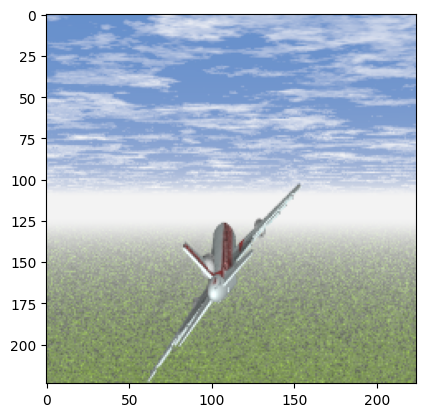

In [4]:
image = cv2.imread(str(Path(df.loc[1,"folder"]) / Path(df.loc[1,"filename"])))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [5]:
df.tail(3)

,folder,filename,angle
9997,train,samolot19995.png,44.437472
9998,train,samolot19997.png,44.662483
9999,train,samolot19999.png,44.887494


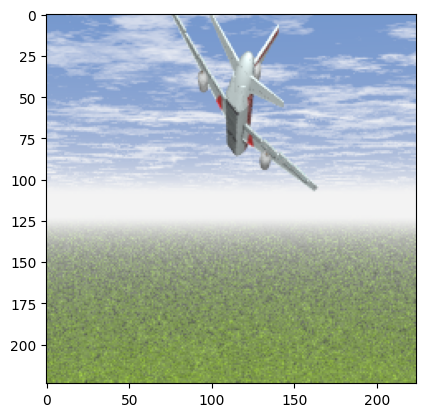

In [6]:
image = cv2.imread(str(Path(df.loc[9998,"folder"]) / Path(df.loc[9998,"filename"])))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

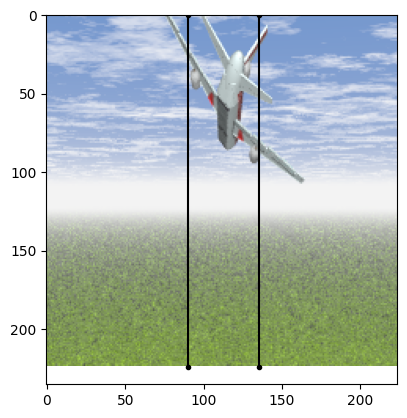

In [7]:
plt.imshow(image)
x1, y1 = [90, 90], [0, 224]
x2, y2 = [135, 135], [0, 224]
plt.plot(x1, y1, x2, y2, marker = '.',color="black")
plt.show()

See: https://platform.openai.com/docs/guides/fine-tuning

In [8]:
strings = []
for i,row in df.iterrows():
    image = cv2.imread(str(Path(row.get("folder")) / Path(row.get("filename"))))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    li = list(gray[:, 90])
    li.extend(list(gray[:, 135]))
    strings.append('{"prompt":" What does '+("-".join([f'{x:x}'.upper() for x in li]))+' represent? ####",' +
                   f'"completion":" It represents the angle of <{row.get("angle"):.0f}> degrees. ###"}}'
                  )
df["strings"]=strings

In [9]:
df.loc[0,"strings"]

'{"prompt":" What does CC-C8-BF-BC-D7-E2-E1-E3-D9-D0-D6-D2-D5-D9-DD-D7-C0-AE-9E-9F-A8-B6-CB-B9-AA-A0-B7-B8-A1-A3-A0-A0-A0-A0-A1-A1-A1-A1-A1-A1-A1-A2-A2-A2-A2-A2-A2-A2-A3-A3-A3-A3-A3-A4-AC-D6-C7-E7-E1-CB-C9-C1-C1-A9-C5-D6-D1-D8-C1-A9-AA-BE-B9-AB-BB-B8-AE-C5-D4-AF-AF-CE-CE-CC-DD-B6-BD-B5-B6-BC-D0-D5-C1-BC-BD-CA-EC-D6-DC-D5-D4-DC-E8-D4-E1-EA-E6-F0-EB-F0-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F2-F0-EE-EB-E9-E5-E4-E1-D9-DF-D3-CD-CD-C3-BE-C0-B6-BE-B5-9C-8E-58-4F-6F-E7-FF-CD-A3-B0-AD-A2-AF-9F-8B-92-B0-98-97-A3-97-96-A4-95-98-8D-85-9E-90-7A-79-88-87-72-60-60-62-63-B6-C5-81-83-87-CE-EA-A9-82-89-90-84-82-8E-89-89-8D-88-7D-82-80-82-91-7F-8C-84-80-79-81-8A-8A-91-81-74-7C-6D-76-85-85-7A-83-84-CF-D0-CE-C7-CC-CA-C0-B3-AE-B4-B4-B9-BA-D6-D0-BC-BF-AA-9E-9E-B1-BD-C4-C7-B2-C6-BA-A1-A0-A0-A0-A0-A0-A0-A1-AF-C8-C8-AE-A1-A1-A2-A2-A2-A2-A2-A2-B9-B9-AB-A8-A3-A6-B4-AB-B5-B8-A5-B0-AC-A6-BC-C6-C1-D2-CB-C9-C4-B7-A9-AA-AA-AA-AB-AB-B8-CF-DB-D6-D3-D5-D3-CA-CE-C6-B7-B4-B5-C6-B7-B8-BD-D2-CB-BE-BF-C2-C3-C5-D6-D5-E1

In [10]:
string = "\n".join([s for s, f in zip(strings, df["folder"]) if f == "train"])
with open("plane_angles.jsonl","w") as file:
    file.write(string)

export OPENAI_API_KEY=$(cat key.yaml | shyaml get-value OPENAI_API_KEY)

openai tools fine_tunes.prepare_data -f plane_angles.jsonl

openai api fine_tunes.create -t plane_angles.jsonl -m ada --suffix "plane angles"

openai api fine_tunes.get -i ft-Y138spkqdIG7tgxYbn4vQzuD

openai api fine_tunes.follow -i ft-Y138spkqdIG7tgxYbn4vQzuD 

openai api fine_tunes.results -i ft-Y138spkqdIG7tgxYbn4vQzuD


In [11]:
testdf = df[df["folder"]=="test"]

In [12]:
testdf = pd.read_csv("test_results.csv")
testdf.head()

,Unnamed: 0,folder,filename,angle,strings,predicted_full,predicted_cut,predicted_numeric
0,6000,test,samolot12001.png,-44.932497,"{""prompt"":"" What does AF-BF-C2-D1-CB-C5-B8-B7-...",It represents the angle of <-41> degrees. ###...,-41,-41.0
1,6001,test,samolot12003.png,-44.707485,"{""prompt"":"" What does AF-C1-C2-D1-CB-C4-B7-B7-...",It represents the angle of <-39> degrees. ###...,-39,-39.0
2,6002,test,samolot12005.png,-44.482474,"{""prompt"":"" What does B0-C2-C3-D1-CB-C4-B7-B7-...",It represents the angle of <-44> degrees. ###...,-44,-44.0
3,6003,test,samolot12007.png,-44.257463,"{""prompt"":"" What does B0-C3-C4-D1-CB-C3-B6-B6-...",It represents the angle of <-41> degrees. ###...,-41,-41.0
4,6004,test,samolot12009.png,-44.032452,"{""prompt"":"" What does B1-C4-C5-D1-CB-C3-B5-B6-...",It represents the angle of <-41> degrees. ###...,-41,-41.0


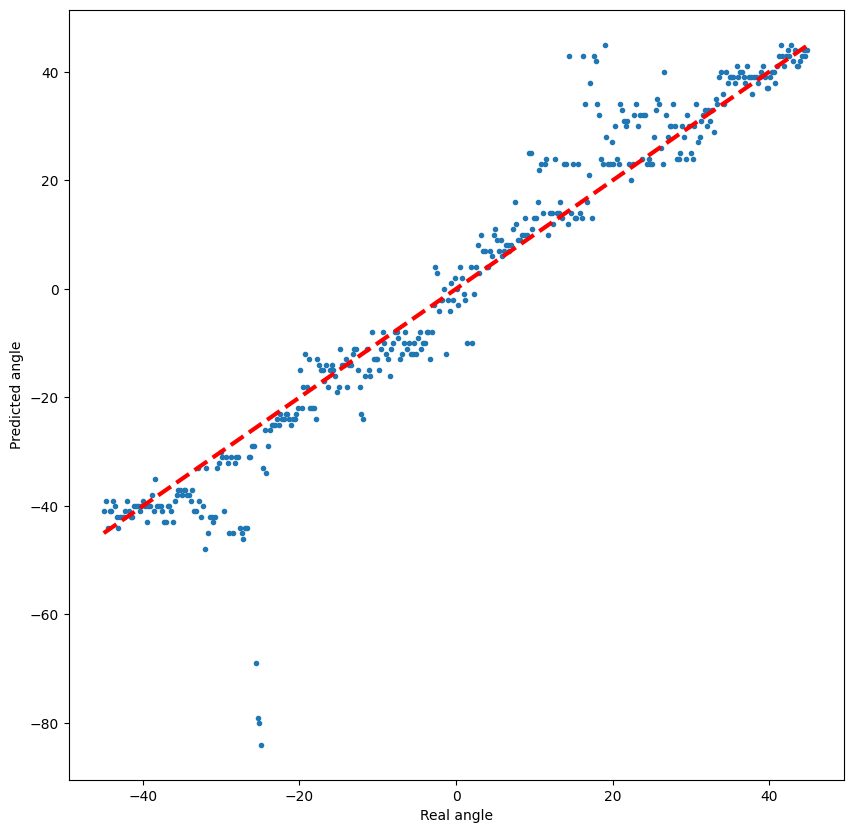

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(testdf["angle"],testdf["predicted_numeric"],marker='.')
plt.plot([-45, 45], [-45, 45], color='red', linestyle='dashed', linewidth=3)
plt.xlabel("Real angle")
plt.ylabel("Predicted angle")
plt.show()

In [13]:
outliers = testdf[abs(testdf["angle"]-testdf["predicted_numeric"])>19]
outliers

,Unnamed: 0,folder,filename,angle,strings,predicted_full,predicted_cut,predicted_numeric
86,6086,test,samolot12173.png,-25.581529,"{""prompt"":"" What does C7-C5-B6-B6-B1-B6-BA-C1-...",It represents the angle of <-69> degrees. ###...,-69,-69.0
87,6087,test,samolot12175.png,-25.356518,"{""prompt"":"" What does C8-C5-B6-B6-B1-B6-B9-C1-...",It represents the angle of <-79> degrees. ###...,-79,-79.0
88,6088,test,samolot12177.png,-25.131507,"{""prompt"":"" What does C9-C4-B6-B6-B1-B6-B9-C1-...",It represents the angle of <-80> degrees. ###...,-80,-80.0
89,6089,test,samolot12179.png,-24.906495,"{""prompt"":"" What does CA-C3-B6-B6-B1-B5-B9-C0-...",It represents the angle of <-84> degrees. ###...,-84,-84.0
264,6264,test,samolot12529.png,14.470474,"{""prompt"":"" What does B3-BD-D1-CF-DB-DA-C7-C7-...",It represents the angle of <43> degrees. ### ...,43,43.0
272,6272,test,samolot12545.png,16.270564,"{""prompt"":"" What does B7-C2-D1-D6-DB-D5-C2-C7-...",It represents the angle of <43> degrees. ### ...,43,43.0
276,6276,test,samolot12553.png,17.170609,"{""prompt"":"" What does BA-C9-D1-D6-DA-D2-C3-C5-...",It represents the angle of <38> degrees. ### ...,38,38.0
278,6278,test,samolot12557.png,17.620631,"{""prompt"":"" What does BB-CD-D1-D6-DB-D0-C3-C2-...",It represents the angle of <43> degrees. ### ...,43,43.0
279,6279,test,samolot12559.png,17.845642,"{""prompt"":"" What does BB-CE-D0-D6-DB-D0-C4-C1-...",It represents the angle of <42> degrees. ### ...,42,42.0
284,6284,test,samolot12569.png,18.970699,"{""prompt"":"" What does BB-D0-CF-D9-DB-CA-C7-C3-...",It represents the angle of <45> degrees. ### ...,45,45.0


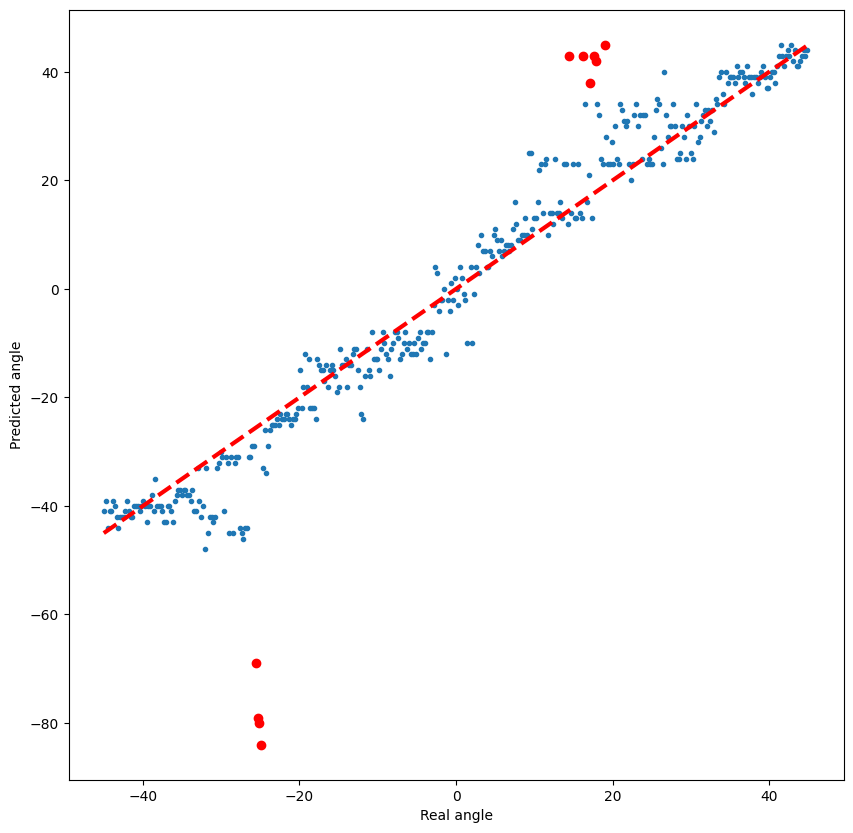

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(testdf["angle"],testdf["predicted_numeric"],marker='.')
plt.scatter(outliers["angle"],outliers["predicted_numeric"],marker='o', color='red')
plt.plot([-45, 45], [-45, 45], color='red', linestyle='dashed', linewidth=3)
plt.xlabel("Real angle")
plt.ylabel("Predicted angle")
plt.show()

-----------------------------------------------------
86
----------------
{"prompt":" What does C7-C5-B6-B6-B1-B6-BA-C1-C5-C8-D3-D3-DD-D7-BE-C0-D6-B3-A4-A5-A5-A5-A5-A5-A6-AA-C6-E0-E9-EA-EA-EA-DB-D7-E9-E0-DF-DC-DC-E0-DF-E2-D6-D2-E5-F0-E8-DE-E6-E2-B6-B8-D2-DB-E0-D6-E2-D3-C1-C3-C6-B0-B3-C3-B9-B1-C5-B3-BB-E3-E1-DD-C5-D4-C3-DC-E0-D4-E7-DD-CB-C0-CB-BE-CC-C6-CA-DF-C7-D2-C7-C8-C9-CB-E6-CF-E2-DC-DC-E4-CD-8B-F7-AD-72-73-9A-9F-CD-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EE-EB-E7-E1-DC-DD-D3-D0-CC-C7-BA-CB-BA-C1-B8-A7-A8-B3-B8-9C-B3-AC-9A-92-AB-9D-A1-A4-95-AE-91-94-9C-87-A3-89-8B-8D-90-92-90-8A-84-8A-87-80-96-8E-85-89-80-86-87-8A-82-8C-87-89-87-84-86-75-8A-88-7E-83-75-8A-79-8C-73-81-86-79-72-84-81-89-70-78-82-7B-90-8B-85-80-70-7B-85-96-80-7D-80-76-7F-87-78-8C-7C-BE-BB-B4-AF-B0-B8-BA-B1-AC-BA-D0-D9-DB-D9-DC-E2-D7-C6-C1-BF-A7-A5-A5-A5-A6-A6-A6-A6-A9-A9-B2-AE-B9-B9-BF-BE-A8-A9-A9-A9-AD-BD-B9-BB-AA-AA-AA-BA-D4-D5-D2-D8-CE-CC-D0-CF-CE-C9-B6-AF-B3-B9-B0-B0-B3-B1-B2-B3-CC-DB-CA-CC-80-94-D9-E2-DC-7

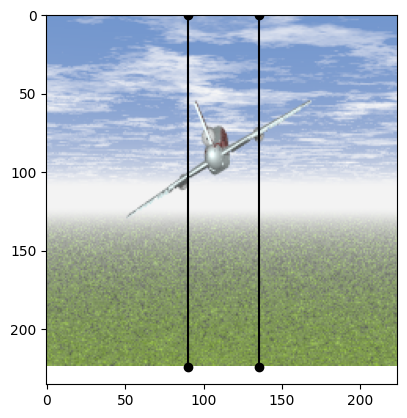

-----------------------------------------------------
87
----------------
{"prompt":" What does C8-C5-B6-B6-B1-B6-B9-C1-C5-C9-D4-D4-DD-D6-BD-C2-D6-B2-A4-A5-A5-A5-A5-A5-A6-AB-C7-E0-E9-E9-E9-EA-DB-D8-E8-E0-DF-DC-DC-E0-DE-E2-D5-D5-E5-F0-E8-DD-E6-E2-B5-BB-D2-DA-E0-D6-E3-D2-C1-C2-C6-B0-B2-C3-B9-B1-C4-B3-BC-E3-E1-DD-C5-D3-C4-DB-E0-D3-E7-DD-CB-C0-CB-BE-CC-C4-CA-E0-C9-D2-C7-C8-C9-CB-E5-CF-E2-DC-DC-E5-BF-91-FD-AC-71-73-9A-9F-CC-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EE-EB-E7-E1-DC-DB-D3-CF-CC-C8-BA-CA-BE-B2-B7-A7-A8-B9-B7-9C-B0-B0-97-93-A4-99-B6-AB-95-9C-91-9C-9E-87-A4-8A-87-91-92-97-92-8B-85-8C-85-86-8D-88-83-85-84-80-7D-83-81-88-86-88-88-85-91-7F-88-87-7B-86-7B-8B-6F-8D-75-81-99-80-72-7A-83-86-73-78-7E-7F-8F-89-90-7F-74-7E-84-8F-83-7F-81-75-77-78-71-8C-7E-BF-BB-B4-B0-B0-B9-BB-B1-AC-BB-D0-DA-DC-D9-DC-E2-D7-C6-C1-BF-A7-A5-A5-A5-A6-A6-A6-A6-A9-A9-B1-AF-B8-BA-BE-BC-A8-A9-A9-A9-AC-BE-B9-B9-AA-AA-AA-BB-D4-D5-D3-D7-CE-CC-D0-CF-CE-C9-B6-AF-B3-B8-B0-B0-B2-B1-B2-B3-CC-DB-CA-CC-85-92-B2-F1-E5-7

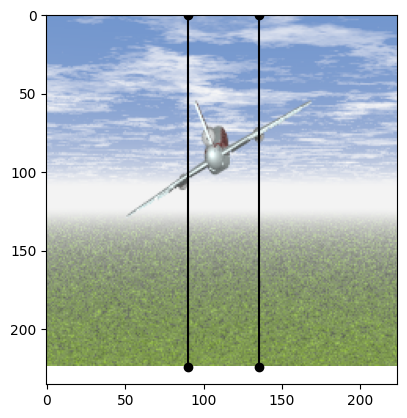

-----------------------------------------------------
88
----------------
{"prompt":" What does C9-C4-B6-B6-B1-B6-B9-C1-C4-C9-D5-D5-DD-D6-BD-C5-D5-B1-A4-A5-A5-A5-A5-A5-A6-AB-C8-E1-E9-E8-E9-EA-DB-D8-E8-E0-DF-DC-DB-E0-DC-E2-D5-D7-E5-F0-E8-DD-E7-E2-B4-BD-D3-DA-DF-D6-E3-D1-C0-C1-C7-B0-B2-C4-B9-B1-C3-B3-BC-E3-E1-DD-C6-D1-C4-DB-E0-D3-E8-DC-CB-C0-CB-BE-CC-C3-CA-E0-CA-D2-C7-C8-C9-CB-E5-CF-E2-DB-DC-DD-B0-98-FE-A3-71-88-9A-9F-D7-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EE-EB-E7-E1-DC-D9-D3-CF-CC-C6-BA-C3-C1-B2-B5-A7-AB-BC-B1-9C-AB-B4-97-9A-9B-A4-B0-A6-96-9D-9A-A3-9E-95-A1-8C-85-92-98-98-93-8A-88-8C-83-87-89-82-6F-8B-83-81-7D-80-80-84-85-87-A1-89-8B-87-8B-86-7A-87-78-79-80-8D-74-83-8A-88-80-82-85-83-7A-70-87-83-8D-80-84-7E-7D-7F-7F-81-85-82-80-72-69-7E-69-75-7C-C0-BA-B4-B0-B0-B9-BC-B0-AC-BB-D0-DA-DC-D9-DD-E2-D7-C6-C1-BE-A5-A5-A5-A5-A6-A6-A6-A6-A9-A8-B0-B0-B7-BB-BE-BA-A8-A9-A9-A9-AB-BE-B8-B7-AA-AA-AA-BB-D4-D4-D3-D7-CF-CD-D0-CF-CE-C9-B5-AF-B2-B7-B0-B0-B1-B1-B2-B3-CC-DB-C9-CC-8E-94-B5-FA-E3-9

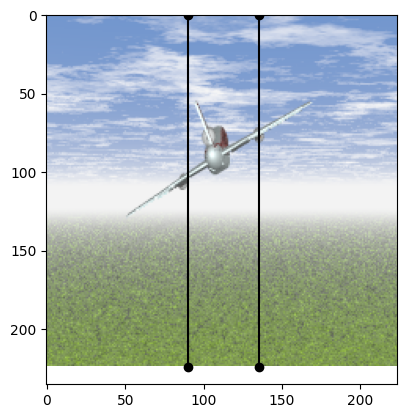

-----------------------------------------------------
89
----------------
{"prompt":" What does CA-C3-B6-B6-B1-B5-B9-C0-C4-CA-D6-D6-DD-D5-BB-C7-D5-B1-A4-A5-A5-A5-A5-A5-A6-AB-C9-E1-E9-E8-E8-E9-DB-D9-E8-E0-DF-DC-DB-DF-DC-E2-D4-D9-E6-F0-E7-DD-E7-E1-B3-BF-D3-DA-DE-D7-E3-D1-C0-C0-C8-B0-B2-C4-B9-B1-C2-B3-BD-E3-E1-DC-C7-D0-C4-DA-DF-D2-E9-DA-C0-C0-CB-BE-CC-C2-CA-E0-CD-D2-C7-C8-C9-CB-E5-CF-E2-DB-DC-DD-A0-A6-F8-98-71-89-9A-AE-D7-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EE-EB-E7-E1-DC-D9-D3-CF-CC-C5-BD-BB-C0-B2-B3-AB-B8-BE-A7-9E-AB-B7-99-9B-97-AC-AB-93-95-AD-91-A7-9C-9E-9C-8D-85-90-91-98-84-6C-8A-8A-84-83-8F-7F-75-82-82-8A-87-7A-71-8F-83-86-99-95-86-8C-90-85-7A-85-79-7A-82-8C-76-85-8B-80-7F-82-87-80-7F-77-83-87-8C-73-83-7E-85-80-7B-72-86-85-81-70-74-88-83-7C-7E-C1-BA-B4-B0-B0-B9-BD-B0-AC-BC-D1-DB-DC-D9-DD-E2-D7-C7-C1-BE-A5-A5-A5-A5-A6-A6-A6-A6-A9-A7-AF-B1-B6-BC-BE-B8-A8-A9-A9-A9-AA-BE-B8-B5-AA-AA-AA-BB-D4-D4-D4-D6-CF-CD-CF-CF-CD-CA-B4-AF-B2-B7-B0-B0-B1-B1-B2-B3-CC-DB-C9-CC-96-94-B2-F8-E1-B

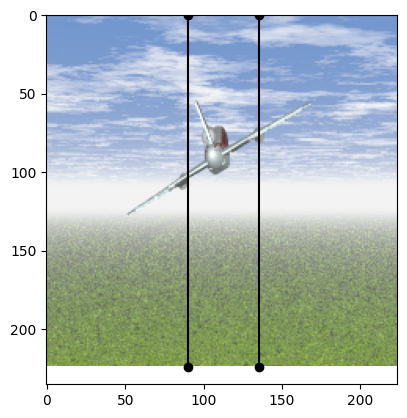

-----------------------------------------------------
264
----------------
{"prompt":" What does B3-BD-D1-CF-DB-DA-C7-C7-C8-CD-B9-A3-A3-A4-A4-A4-A4-A4-A4-A6-BE-E2-E8-ED-E5-E9-E2-D6-D5-E5-E2-DC-D7-E1-E1-DC-CD-E1-D8-C7-E2-E5-F3-EE-E5-EA-DB-AC-C2-CC-DE-E2-D2-E7-E7-CF-C4-C4-C8-AF-BE-C4-B6-B2-BD-B1-B4-DF-DB-E3-BA-CA-BA-D2-E1-DB-D5-EC-DB-CC-B4-94-C0-DF-D2-AA-CA-DF-E6-CF-C7-D6-C9-DC-E2-CF-DA-EB-D5-D7-DA-DC-DF-E8-E8-E9-EC-F2-F2-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F2-EE-EB-E6-E4-DE-DD-D9-CD-CF-CA-B8-BC-B6-AF-BC-A9-AD-BD-A3-9C-AB-9F-95-92-99-A2-AF-90-8E-90-98-9A-94-97-8C-9F-8A-8D-8C-93-89-88-85-89-7C-7A-94-7C-8B-86-85-7E-8A-86-85-81-99-8A-77-7E-7B-84-8A-88-7D-8F-86-7A-6F-6F-7B-8F-8B-78-68-86-7E-70-8C-7A-91-8D-8C-85-81-81-80-91-8C-8D-7A-80-81-68-7B-72-83-95-88-AD-BF-CD-D6-DC-DC-DB-DE-E0-D6-C3-BB-B0-A4-A4-A4-A4-A4-A4-A5-A5-A5-A5-A8-B4-A9-B2-BA-BE-BC-BD-A7-A7-A7-A8-A8-B1-C0-B6-BD-A9-A9-A9-B0-C6-CD-D5-D9-D6-D0-CA-CD-CF-D3-CE-C7-AF-AE-B8-B1-AF-B0-B0-B0-B1-B1-BC-D1-D4-D2-C3-B9-D7-D4-B7-B7-B8-

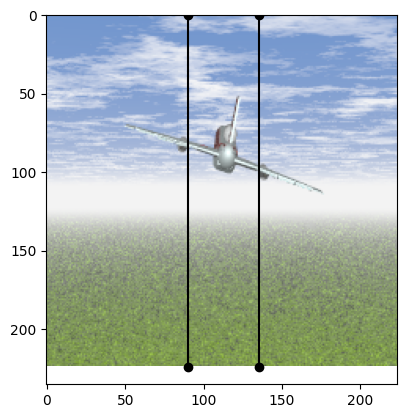

-----------------------------------------------------
272
----------------
{"prompt":" What does B7-C2-D1-D6-DB-D5-C2-C7-D4-C6-B1-A3-A3-A4-A4-A4-A4-A4-A4-A9-CA-E4-E8-ED-E6-E8-E0-CD-D9-E6-DF-DD-D8-DA-DD-D9-D5-E2-D5-D2-E4-EC-F0-EC-E3-ED-D5-AB-C5-D3-DC-E3-D7-E5-E1-CC-CE-BF-BD-AF-C3-C4-B5-B0-C7-B1-B6-E0-E0-E3-BC-C4-B6-CE-E0-DE-D4-EB-D6-AD-8F-D2-D1-CB-AA-C2-C2-D9-EC-D5-C7-D3-C9-E0-E1-CF-D5-EE-D6-D7-DA-DC-DF-E9-E6-E9-EC-F2-F1-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EF-EC-E6-E5-DB-D8-D6-CD-DA-D3-BB-C1-BD-B3-BA-B6-B1-BD-AF-AE-B4-A5-95-9B-9D-95-A4-94-A5-9E-96-97-85-86-A0-9B-8E-7D-7F-80-99-8A-89-79-93-7A-7A-89-81-7E-79-89-8E-85-82-8C-87-80-83-84-75-77-80-8F-91-89-95-82-80-66-86-8B-72-81-68-77-87-80-89-82-6F-71-84-93-83-82-86-87-91-8A-8C-7B-75-60-61-83-85-84-88-B8-C9-D0-DB-DC-DD-D9-E0-DA-D5-BB-B9-AE-A4-A4-A4-A4-A4-A4-A5-A5-A5-AC-B1-B1-AC-B7-B3-BF-BF-AC-A7-A7-A7-A8-A8-AE-C0-B6-AB-A9-A9-A9-B8-D0-D2-D5-D9-D6-D1-CC-D0-D2-D1-CD-BA-B5-AE-B5-B1-AF-B0-B0-B0-B1-B1-C4-D4-D1-D0-C6-B8-DB-D3-B7-B7-B8-

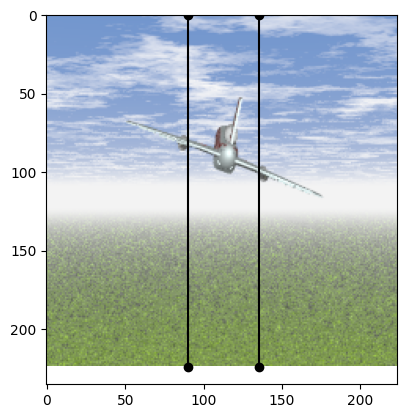

-----------------------------------------------------
276
----------------
{"prompt":" What does BA-C9-D1-D6-DA-D2-C3-C5-D3-C1-AB-A3-A3-A4-A4-A4-A4-A4-A4-AD-D1-E4-E7-EB-E7-E7-DE-D0-D9-E7-DE-DD-DA-D9-DC-D5-D8-E2-D2-D5-E5-ED-EE-E8-E1-EA-D2-AB-C6-D9-DB-E2-DC-E5-DB-CB-CF-BC-BB-AF-C4-C3-B6-B0-CA-B1-B6-E1-E1-E1-BD-C5-C0-CE-DE-DC-D7-E7-CE-96-94-E5-D8-86-C3-C1-C3-D6-E4-D4-C9-D2-C9-E0-E0-CF-D5-EE-D5-D7-DA-DC-DF-E9-E5-E9-EC-F2-F1-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F2-EE-ED-E6-E1-E0-D7-D3-D0-D0-CD-B9-BC-BD-B8-C1-B9-A9-B7-BA-9C-AF-9F-9E-93-B0-9A-90-A3-83-9F-99-91-92-95-97-9B-8C-8B-8F-97-8B-96-88-87-80-8C-9E-83-83-7E-8A-74-86-77-7C-73-83-73-86-86-87-8E-71-79-79-88-7C-80-7A-6D-7B-8B-80-75-86-81-6E-70-6B-6E-85-86-84-85-87-7A-76-8B-83-80-7C-81-75-79-80-7D-88-8A-82-BA-CE-D2-DE-DC-DD-DB-E1-D8-D3-BA-B2-AA-A4-A4-A4-A4-A4-A4-A5-A5-A5-AF-B4-B0-AE-BB-B5-BC-C0-AE-A7-A7-A7-A8-A8-AD-C1-B8-AC-A9-A9-A9-BC-D3-D3-D6-D8-D5-D1-CC-D2-D5-D0-CC-B9-B6-AE-B3-B1-AF-B0-B2-B0-B1-B1-C5-D5-CF-CD-C6-B9-DC-CF-B7-B7-B8-

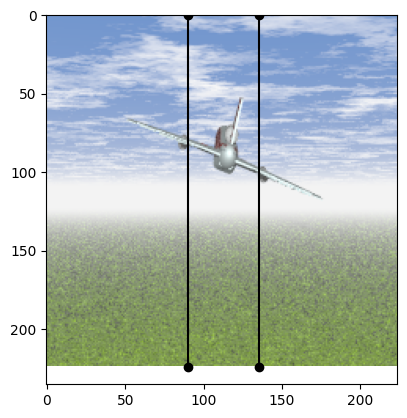

-----------------------------------------------------
278
----------------
{"prompt":" What does BB-CD-D1-D6-DB-D0-C3-C2-D1-BF-A9-A3-A3-A4-A4-A4-A4-A4-A4-AF-D4-E4-E7-EA-E7-E8-DD-D3-DA-E8-DE-DC-DB-DA-DC-D5-D9-E3-CF-D6-E5-ED-EC-E8-E0-EA-CF-AB-C6-DB-DB-E2-DD-E6-D8-C9-CF-BA-BA-AF-C5-C2-B7-B0-C9-B1-B6-E1-E1-E1-BD-C5-C1-CE-DE-DB-D9-E0-AE-94-AD-C7-D9-78-C3-C2-C4-D6-E0-D4-CC-D2-C9-E0-DF-D0-D5-EE-D5-D7-DA-DC-DF-E9-E5-E9-EC-F2-F1-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EE-EB-E7-E1-E8-DD-D3-CF-CC-CA-BB-C4-BC-AF-B3-C1-A7-B0-AD-9C-B1-9F-A1-A8-AB-9A-90-96-9B-8F-91-91-8C-92-87-9A-8E-92-8C-8D-95-8F-94-85-88-8E-94-8F-8D-8A-89-83-7D-71-87-8C-94-7B-86-84-84-8B-6E-6E-64-85-7C-89-75-80-80-82-82-7E-94-84-69-85-84-6E-87-8A-89-8A-89-80-74-89-86-8B-7A-89-83-7B-80-93-80-79-80-BA-D0-D4-DF-DB-DD-DC-E2-D8-D0-B9-AF-A8-A4-A4-A4-A4-A4-A4-A5-A5-A5-B0-B4-AF-AF-BD-B6-BC-C0-AB-A7-A7-A7-A8-A8-AD-C1-B8-B0-A9-A9-A9-BD-D4-D3-D6-D8-D3-D1-CD-D2-D5-D0-CC-B8-B6-AE-B4-AF-AF-B0-B1-B0-B1-B1-C5-D6-CE-CC-C5-B8-DC-CE-B8-B7-B8-

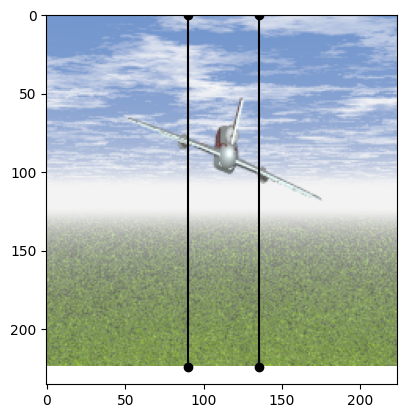

-----------------------------------------------------
279
----------------
{"prompt":" What does BB-CE-D0-D6-DB-D0-C4-C1-D1-BE-A9-A3-A3-A4-A4-A4-A4-A4-A4-B0-D5-E3-E7-EA-E7-E8-DD-D4-DC-E8-DE-DC-DB-DB-DC-D5-D9-E3-CD-D6-E4-ED-EB-E8-DF-EA-CE-AB-C6-DB-DB-E2-DE-E6-D7-C8-CE-B8-BB-AF-C6-C2-B7-B0-C8-B1-B7-E1-E1-E1-BD-C5-C0-CE-DE-DA-DA-E0-AC-8C-C6-C9-C7-92-C3-C2-C5-D7-DF-D3-CE-D2-C9-E0-DF-D1-D5-EE-D5-D7-DA-DC-DF-E8-E5-E9-EC-F2-F1-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EE-EB-E7-E1-E5-DA-D8-CE-CC-C7-C2-C5-B8-AF-B3-BB-A7-B0-AD-9C-B7-A1-A0-B5-A3-93-A0-97-99-8F-8E-91-88-96-89-9A-8E-90-8C-8B-96-86-94-93-92-8E-94-90-86-92-8A-7E-7D-71-8F-8E-94-80-8B-96-83-89-76-6F-64-85-7C-88-7A-8A-7D-7E-7C-82-84-87-69-83-84-7F-96-7D-84-98-88-80-78-89-85-92-80-8D-87-79-7E-81-82-76-87-BA-D0-D4-DF-DB-DD-DC-E2-D8-CE-B9-AD-A7-A4-A4-A4-A4-A4-A4-A5-A5-A5-B0-B5-AF-AF-BE-B6-BC-C0-AB-A7-A7-A7-A8-A8-AD-C1-B8-B1-A9-A9-A9-BD-D5-D2-D6-D9-D2-D1-CD-D2-D5-CF-CC-B8-B5-AE-B4-AF-AF-B0-B1-B0-B1-B1-C5-D6-CC-CC-C4-B8-DC-CD-B8-B7-B8-

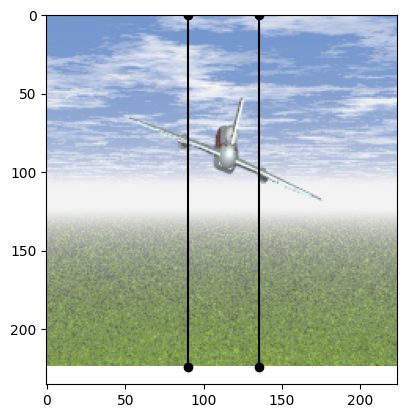

-----------------------------------------------------
284
----------------
{"prompt":" What does BB-D0-CF-D9-DB-CA-C7-C3-CE-B9-A3-A3-A3-A4-A4-A4-A4-A4-A4-B6-DA-E4-E8-E7-E6-EA-D8-D6-E3-E5-DC-D8-DB-DD-DF-DA-DD-DE-C9-D8-E3-EC-E8-EA-DF-EA-C9-AD-C6-DC-DB-E1-DE-E7-D5-C5-CC-B7-BC-B0-C6-BE-B7-B0-C1-B1-B9-E1-E3-DF-BD-C6-B6-CE-DF-D6-D3-AC-89-AB-D0-DE-75-AC-C3-C3-C7-D9-D8-D2-D1-D6-C9-DF-DC-D1-D6-EE-D5-D7-DA-DC-DF-E8-E5-E9-EC-F2-F1-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F3-F1-EF-ED-E6-E1-DB-E0-D6-D5-CC-C8-C9-BE-B6-B9-B6-B7-A8-B5-B1-AE-AE-9F-96-9D-91-93-A4-8A-8F-A9-8D-9C-90-99-97-8C-9C-8B-7F-8F-9A-8B-93-7F-87-7A-8C-88-89-94-88-6D-7D-83-84-94-80-8A-8A-72-71-7A-7C-83-78-7F-8D-78-7A-8A-80-85-95-80-88-81-7A-87-81-88-7F-83-88-7E-89-7F-73-7D-7A-80-80-75-71-71-7C-88-7F-81-81-BF-CE-D6-DD-DB-DC-DE-E1-D8-C8-B6-AA-A3-A4-A4-A4-A4-A4-A4-A5-A5-A5-AC-B6-AB-B1-C1-B6-BC-BF-A8-A7-A7-A7-A8-A8-AB-C2-B9-B7-A9-A9-A9-B5-CF-D2-D5-DB-CE-D3-CE-CF-D2-CF-CD-B3-B0-AE-B5-AF-AF-B0-B0-B0-B1-B1-C8-DA-C9-CC-C0-B7-DC-CD-B9-B7-B8-

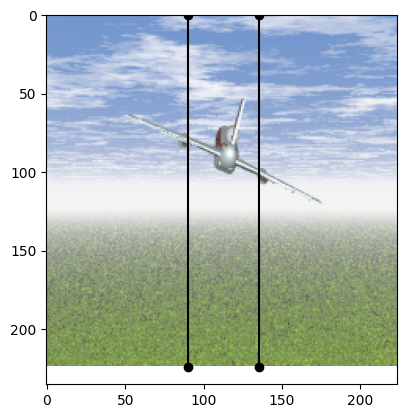

In [16]:
for i,r in outliers.iterrows():
    print("-----------------------------------------------------")
    print(i)
    print("----------------")
    print(r["strings"])
    print("----------------")
    print(r["predicted_full"])
    image = cv2.imread(str(Path(r["folder"]) / Path(r["filename"])))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    x1, y1 = [90, 90], [0, 224]
    x2, y2 = [135, 135], [0, 224]
    plt.plot(x1, y1, x2, y2, marker = 'o',color="black")
    plt.show()